In [1]:
# Import libraries
import os
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from pycaret.classification import *
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pycaret'

In [2]:
# setting font
plt.rc('font', family='AppleGothic') # For Windows
print(plt.rcParams['font.family'])

['AppleGothic']


In [59]:
# Function for confusion matrix visualization
def plot_confusion_matrix(cm, model=None, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    NAME_FIG = "./" + model + "_CM.png"
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.savefig(NAME_FIG, dpi = 300, bbox_inches = 'tight')
    plt.show()

In [60]:
# Load data
df2021_character = pd.read_csv("./preprocessed_data/df2021_character.csv")

In [61]:
# Check the distribution of the target column
df2021_character['next_power_level'].value_counts().sort_index()

1    1799
2    3693
3    3267
4    3528
5    2449
6     531
7     105
Name: next_power_level, dtype: int64

In [62]:

features = df2021_character.drop(["next_power_level"], axis = 1)
label = df2021_character["next_power_level"]

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.2, random_state = 2023, shuffle = True, stratify = label)# 데이터 스플릿

In [63]:
features_train.head()

,power_difference,low_dungeon,high_dungeon,quest_dungeon,current_power_level
5674,-60674.4,0.0,0.0,0.0,3
5717,0.0,0.0,0.0,0.0,2
13611,15082.8,4.0,3.0,0.0,5
1058,11061.6,0.0,0.0,0.0,3
6433,1170249.6,40.0,0.0,0.0,7


In [64]:
# Check the dimensions of the split data
print("학습 특징 차원:", features_train.shape)
print("학습 레이블 차원:", label_train.shape)
print("테스트 특징 차원:", features_test.shape)
print("테스트 레이블 차원:", label_test.shape)

# Training feature dimensions: (12297, 5)
# Training label dimensions: (12297,)
# Test feature dimensions: (3075, 5)
# Test label dimensions: (3075,)

학습 특징 차원: (12297, 5)
학습 레이블 차원: (12297,)
테스트 특징 차원: (3075, 5)
테스트 레이블 차원: (3075,)


In [65]:
# PyCaret initial setup
df_train = pd.concat([features_train, label_train], axis = 1)

cell_start_time = time()
clf = setup(data = df_train, target = "next_power_level", train_size = 0.8, fix_imbalance = True)

cell_end_time = time()

print("셀 실행 시간:", cell_end_time - cell_start_time) # Cell execution time

,Description,Value
0,Session id,6097
1,Target,next_power_level
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6"
4,Original data shape,"(12297, 6)"
5,Transformed data shape,"(19001, 6)"
6,Transformed train set shape,"(16541, 6)"
7,Transformed test set shape,"(2460, 6)"
8,Numeric features,5
9,Preprocess,True


셀 실행 시간: 0.8062605857849121


In [66]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [67]:
# Check the top 3 models
# Classification Metric (Accuracy, Precision, Recall, F1-score)
top3_models = compare_models(fold = 10, round = 3, sort = 'F1', n_select = 3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:46:50
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.914,0.992,0.914,0.915,0.914,0.893,0.893,1.687
lightgbm,Light Gradient Boosting Machine,0.909,0.992,0.909,0.909,0.909,0.887,0.887,0.408
rf,Random Forest Classifier,0.900,0.988,0.900,0.901,0.900,0.876,0.876,0.203
et,Extra Trees Classifier,0.900,0.985,0.900,0.901,0.900,0.876,0.876,0.139
dt,Decision Tree Classifier,0.885,0.929,0.885,0.886,0.885,0.857,0.857,0.021
lda,Linear Discriminant Analysis,0.872,0.986,0.872,0.874,0.872,0.841,0.841,0.019
knn,K Neighbors Classifier,0.496,0.784,0.496,0.526,0.503,0.388,0.390,0.371
ada,Ada Boost Classifier,0.450,0.656,0.450,0.284,0.332,0.344,0.388,0.125
ridge,Ridge Classifier,0.310,0.000,0.310,0.314,0.263,0.216,0.274,0.016
nb,Naive Bayes,0.265,0.703,0.265,0.348,0.243,0.132,0.156,0.016


In [68]:
# Model definition
gbc_model = create_model('gbc', fold = 10)
gbc_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9146,0.9909,0.9146,0.9157,0.9145,0.8938,0.8940
1,0.9207,0.9933,0.9207,0.9210,0.9207,0.9015,0.9016
2,0.8974,0.9924,0.8974,0.8991,0.8980,0.8724,0.8724
3,0.9217,0.9894,0.9217,0.9217,0.9216,0.9027,0.9027
4,0.9024,0.9909,0.9024,0.9040,0.9023,0.8786,0.8791
5,0.9146,0.9915,0.9146,0.9148,0.9145,0.8939,0.8939
6,0.9126,0.9923,0.9126,0.9137,0.9129,0.8914,0.8915
7,0.9135,0.9922,0.9135,0.9164,0.9140,0.8924,0.8928
8,0.9054,0.9898,0.9054,0.9060,0.9054,0.8824,0.8825


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6097, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
# Model fine-tuning
gbc_model = tune_model(gbc_model, fold = 3, optimize = 'F1', choose_better = True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:48:15
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9131,0.9911,0.9131,0.9136,0.9131,0.8919,0.8919
1,0.9128,0.9909,0.9128,0.9134,0.9129,0.8915,0.8916
2,0.9116,0.9900,0.9116,0.9116,0.9115,0.8900,0.8901
Mean,0.9125,0.9907,0.9125,0.9128,0.9125,0.8911,0.8912
Std,0.0007,0.0005,0.0007,0.0009,0.0007,0.0008,0.0008


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [70]:
# Model definition
rf_model = create_model('rf', fold = 10)
rf_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9035,0.9848,0.9035,0.9037,0.9033,0.8798,0.8799
1,0.9055,0.9906,0.9055,0.9055,0.9054,0.8825,0.8826
2,0.8780,0.9865,0.8780,0.8789,0.8782,0.8484,0.8485
3,0.8913,0.9863,0.8913,0.8908,0.8908,0.8646,0.8647
4,0.8963,0.9847,0.8963,0.8968,0.8961,0.8709,0.8712
5,0.9146,0.9915,0.9146,0.9148,0.9147,0.8939,0.8939
6,0.9096,0.9874,0.9096,0.9105,0.9097,0.8877,0.8877
7,0.9166,0.9884,0.9166,0.9170,0.9167,0.8962,0.8963
8,0.8911,0.9897,0.8911,0.8915,0.8912,0.8648,0.8648


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6097, verbose=0, warm_start=False)

In [71]:
# Model fine-tuning
rf_model = tune_model(rf_model, fold = 3, optimize = 'F1', choose_better = True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:49:43
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9109,0.9909,0.9109,0.9111,0.9109,0.8892,0.8892
1,0.9164,0.9923,0.9164,0.9165,0.9163,0.8960,0.8961
2,0.9143,0.9899,0.9143,0.9143,0.9143,0.8934,0.8935
Mean,0.9139,0.9910,0.9139,0.9140,0.9138,0.8929,0.8929
Std,0.0023,0.0010,0.0023,0.0022,0.0022,0.0028,0.0028


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [72]:
# Ensemble
tuned_models = [gbc_model, rf_model]

In [73]:
# Bagging, Boosting, Voting
blend_model = blend_models(estimator_list = tuned_models)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:49:50
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9187,0.9909,0.9187,0.9197,0.9186,0.8988,0.8990
1,0.9207,0.9942,0.9207,0.9209,0.9207,0.9015,0.9015
2,0.8994,0.9923,0.8994,0.9008,0.8997,0.8748,0.8749
3,0.9228,0.9926,0.9228,0.9225,0.9226,0.9039,0.9039
4,0.9116,0.9927,0.9116,0.9122,0.9114,0.8900,0.8902
5,0.9228,0.9934,0.9228,0.9230,0.9227,0.9039,0.9040
6,0.9157,0.9922,0.9157,0.9168,0.9158,0.8951,0.8952
7,0.9196,0.9931,0.9196,0.9204,0.9197,0.9000,0.9001
8,0.9064,0.9915,0.9064,0.9068,0.9064,0.8837,0.8837


In [74]:
# Select the final model
final_gbc_model = finalize_model(gbc_model)

# Input test data into the final model and check predictions
prediction = predict_model(final_gbc_model, data = features_test)

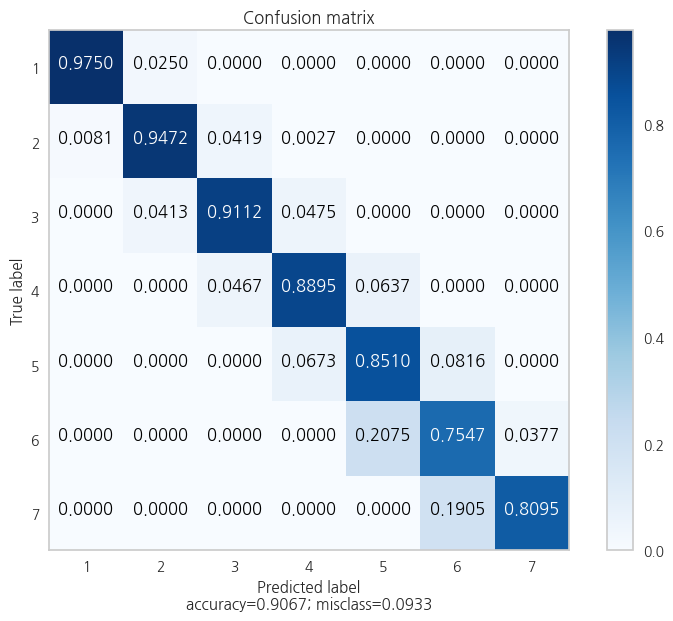

In [75]:
cf = confusion_matrix(label_test, prediction["prediction_label"])

plot_confusion_matrix(cf, model = "GBC", target_names = ["1", "2", "3", "4", "5", "6", "7"])

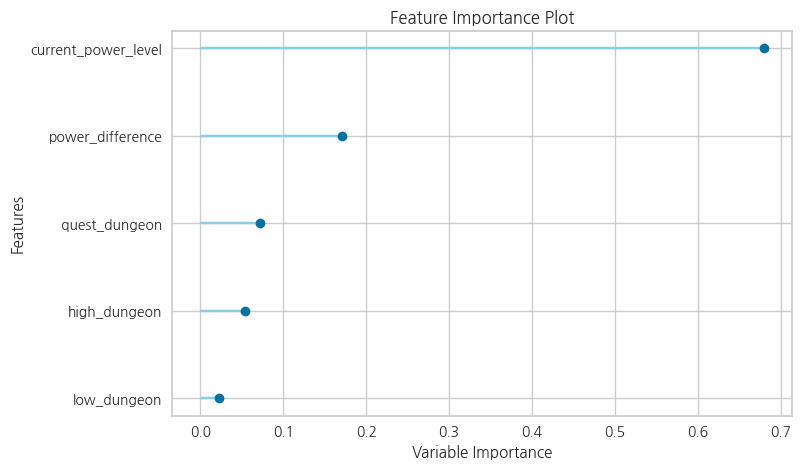

In [76]:
plot_model(estimator = final_gbc_model, plot = 'feature')

Per user - next month’s attendance

In [2]:
from pycaret.regression import *

ModuleNotFoundError: No module named 'pycaret'

In [85]:
# Load data
df_user = pd.read_csv("./preprocessed_data/df2021_user.csv")

In [86]:
# Remove rows where payment is 0
df_user_nz = df_user[df_user["next_paid"] != 0]

In [87]:
# Inspect the top 5 rows
df_user_nz.head()

,current_attendance,current_paid,num_characters,power_level,next_attendance,next_paid
0,17,0.0,1,3,13,14000.0
1,13,14000.0,1,4,26,5000.0
4,1,0.0,1,4,16,12950.0
5,16,12950.0,1,4,22,8300.0
17,0,0.0,1,1,9,6050.0


In [88]:
# Convert next month’s payment
def convert_paid(x):
    if (x >= 0) and (x <= 1000):
        x = 1
    elif (x > 1000) and (x <= 5000):
        x = 2
    elif (x > 5000) and (x <= 10000):
        x = 3
    elif (x > 10000) and (x <= 20000):
        x = 4
    elif (x > 20000) and (x <= 30000):
        x = 5
    elif (x > 30000) and (x <= 40000):
        x = 6
    elif (x > 40000) and (x <= 50000):
        x = 7
    elif (x > 50000) and (x <= 100000):
        x = 8
    else:
        x = 9
    
    return x

df_user_nz["current_paid"] = df_user_nz["current_paid"].apply(convert_paid)
df_user_nz["next_paid"] = df_user_nz["next_paid"].apply(convert_paid)

In [89]:
# Data split
features = df_user_nz.drop(["next_attendance", "next_paid"], axis = 1)
label = df_user_nz["next_attendance"]

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.2, random_state = 2023, shuffle = True, stratify = label)

In [92]:
df_train = pd.concat([features_train, label_train], axis = 1)

reg = setup(data = df_train, target = "next_attendance", train_size = 0.8)

,Description,Value
0,Session id,327
1,Target,next_attendance
2,Target type,Regression
3,Original data shape,"(10428, 5)"
4,Transformed data shape,"(10428, 5)"
5,Transformed train set shape,"(8342, 5)"
6,Transformed test set shape,"(2086, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [94]:
# Check the top 3 models
top3_models = compare_models(round = 3, sort = 'RMSE', n_select = 3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:52:55
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,4.934,42.447,6.511,0.644,0.645,1.050,0.031
lightgbm,Light Gradient Boosting Machine,4.946,43.369,6.581,0.636,0.643,1.037,0.055
ridge,Ridge Regression,5.075,43.834,6.616,0.632,0.664,1.104,0.007
lar,Least Angle Regression,5.075,43.834,6.616,0.632,0.664,1.104,0.008
br,Bayesian Ridge,5.076,43.834,6.616,0.632,0.664,1.106,0.006
lr,Linear Regression,5.075,43.834,6.616,0.632,0.664,1.104,0.010
en,Elastic Net,5.175,44.747,6.685,0.624,0.684,1.179,0.007
omp,Orthogonal Matching Pursuit,5.194,45.324,6.728,0.620,0.687,1.183,0.007
llar,Lasso Least Angle Regression,5.215,45.320,6.728,0.620,0.689,1.195,0.006
lasso,Lasso Regression,5.215,45.320,6.728,0.620,0.689,1.195,0.008


In [97]:
# create model
gbr_model = create_model('gbr', cross_validation=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.2563,50.7438,7.1235,0.5797,0.6658,1.0680
1,4.9145,42.3978,6.5114,0.6388,0.6402,1.0123
2,4.9402,42.0022,6.4809,0.6518,0.6469,1.0731
3,4.9531,41.4773,6.4403,0.6468,0.6448,1.0755
4,4.9921,42.9804,6.5559,0.6316,0.6596,1.1073
5,4.8987,43.0348,6.5601,0.6506,0.6325,0.9755
6,4.7654,40.6525,6.3759,0.6485,0.6431,1.0488
7,4.8356,40.6243,6.3737,0.6550,0.6238,0.9840
8,4.8799,41.2870,6.4255,0.6582,0.6234,0.9718


In [98]:
# Hyperparameter tuning
tuned_gbr_model = tune_model(gbr_model, optimize = "RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3634,52.1293,7.2201,0.5682,0.6685,1.0608
1,5.0047,44.1171,6.6421,0.6242,0.6429,1.0126
2,4.9447,43.0644,6.5623,0.6430,0.6482,1.0627
3,4.9914,42.4925,6.5186,0.6381,0.6456,1.0707
4,5.0200,44.2898,6.6551,0.6204,0.6624,1.1081
5,4.8884,43.6986,6.6105,0.6452,0.6402,0.9885
6,4.8093,41.7197,6.4591,0.6393,0.6430,1.0386
7,4.8508,41.2047,6.4191,0.6501,0.6158,0.9590
8,4.9279,42.6966,6.5343,0.6465,0.6282,0.9740


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [99]:
# Define the final model
final_gbr_model = finalize_model(tuned_gbr_model)

prediction = predict_model(final_gbr_model, data = features_test)

In [103]:
prediction["prediction_label"] = np.round(prediction["prediction_label"], 0)

In [111]:
# Based on prediction["prediction_label"] column and label_test column
predict_result = pd.concat([prediction["prediction_label"], label_test], axis = 1)

predict_result.to_csv("./regression_result_gbr.csv", index=False, encoding="utf-8-sig")

In [114]:
# Accuracy (Not accurate due to being regression)
pred_acc = (prediction["prediction_label"] == label_test).sum() / len(label_test)
pred_acc * 100

6.559263521288838

In [ ]:
# MAE, MSE, RMSE, R2
# The scale of attendance days is 1 ~ 30